In [1]:
import sklearn
print(sklearn.__version__)

1.0.2


In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)

print(X.shape, y.shape)

(1000, 20) (1000,)


In [3]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)

model = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.901 (0.023)


In [4]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)

model = RandomForestClassifier()

model.fit(X, y)

row = [[-8.52381793,5.24451077,-12.14967704,-2.92949242,0.99314133,0.67326595,-0.38657932,1.27955683,-0.60712621,3.20807316,0.60504151,-1.38706415,8.92444588,-7.43027595,-2.33653219,1.10358169,0.21547782,1.05057966,0.6975331,0.26076035]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


In [5]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)

print(X.shape, y.shape)

(1000, 20) (1000,)


In [6]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)

model = RandomForestRegressor()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -90.255 (7.640)


In [7]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)

model = RandomForestRegressor()

model.fit(X, y)

row = [[-0.89483109,-1.0670149,-0.25448694,-0.53850126,0.21082105,1.37435592,0.71203659,0.73093031,-1.25878104,-2.01656886,0.51906798,0.62767387,0.96250155,1.31410617,-1.25527295,-0.85079036,0.24129757,-0.17571721,-1.11454339,0.36268268]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: -157


>0.1 0.858 (0.028)
>0.2 0.874 (0.028)
>0.3 0.883 (0.023)
>0.4 0.891 (0.025)
>0.5 0.894 (0.026)
>0.6 0.895 (0.024)
>0.7 0.900 (0.025)
>0.8 0.902 (0.023)
>0.9 0.905 (0.026)
>1.0 0.906 (0.026)


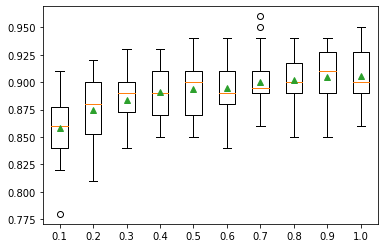

In [8]:
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
 
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y
 
def get_models():
	models = dict()
	
	for i in arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
	
		if i == 1.0:
			i = None
		models[key] = RandomForestClassifier(max_samples=i)
	return models
 
def evaluate_model(model, X, y):

	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

X, y = get_dataset()

models = get_models()

results, names = list(), list()
for name, model in models.items():
	
	scores = evaluate_model(model, X, y)
	
	results.append(scores)
	names.append(name)
	
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>1 0.891 (0.026)
>2 0.897 (0.025)
>3 0.900 (0.025)
>4 0.903 (0.027)
>5 0.899 (0.028)
>6 0.900 (0.028)
>7 0.902 (0.023)


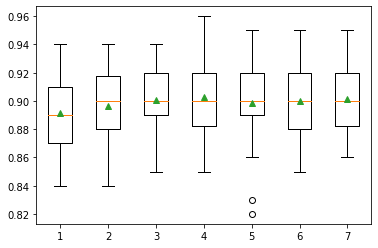

In [9]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
 
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y
 
def get_models():
	models = dict()
	
	for i in range(1,8):
		models[str(i)] = RandomForestClassifier(max_features=i)
	return models
 

def evaluate_model(model, X, y):

	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
X, y = get_dataset()

models = get_models()

results, names = list(), list()
for name, model in models.items():

	scores = evaluate_model(model, X, y)
	
	results.append(scores)
	names.append(name)

	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>10 0.870 (0.032)
>50 0.894 (0.026)
>100 0.903 (0.026)
>500 0.907 (0.025)
>1000 0.908 (0.026)


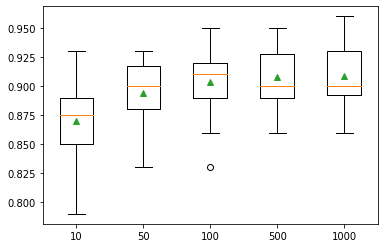

In [10]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y
 
def get_models():
	models = dict()

	n_trees = [10, 50, 100, 500, 1000]
	for n in n_trees:
		models[str(n)] = RandomForestClassifier(n_estimators=n)
	return models
 
def evaluate_model(model, X, y):
	
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 

X, y = get_dataset()

models = get_models()

results, names = list(), list()
for name, model in models.items():
	
	scores = evaluate_model(model, X, y)
	
	results.append(scores)
	names.append(name)

	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>10 0.861 (0.040)
>50 0.895 (0.028)
>100 0.904 (0.025)
>500 0.907 (0.022)
>1000 0.906 (0.024)


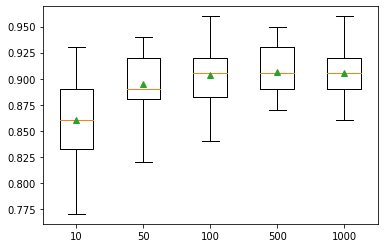

In [11]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
 
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y

def get_models():
	models = dict()

	n_trees = [10, 50, 100, 500, 1000]
	for n in n_trees:
		models[str(n)] = RandomForestClassifier(n_estimators=n)
	return models

def evaluate_model(model, X, y):
	
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 

X, y = get_dataset()

models = get_models()

results, names = list(), list()
for name, model in models.items():

	scores = evaluate_model(model, X, y)

	results.append(scores)
	names.append(name)

	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>1 0.771 (0.031)
>2 0.813 (0.038)
>3 0.838 (0.029)
>4 0.859 (0.029)
>5 0.875 (0.026)
>6 0.881 (0.026)
>7 0.889 (0.024)
>None 0.906 (0.032)


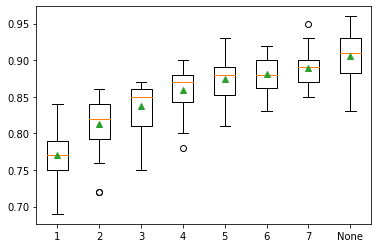

In [12]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y
 
def get_models():
	models = dict()

	depths = [i for i in range(1,8)] + [None]
	for n in depths:
		models[str(n)] = RandomForestClassifier(max_depth=n)
	return models

def evaluate_model(model, X, y):

	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 

X, y = get_dataset()

models = get_models()

results, names = list(), list()
for name, model in models.items():

	scores = evaluate_model(model, X, y)

	results.append(scores)
	names.append(name)

	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()